In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
from matplotlib.patches import Rectangle

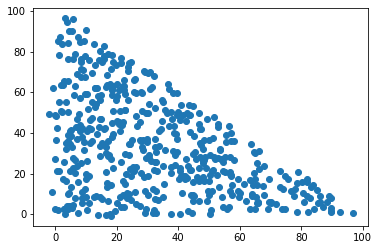

In [2]:
n= 1000
data = np.random.rand(n,2)*100
data = data[data.sum(1)<100]
data = data + + np.random.normal(size=data.shape)*1

plt.scatter(*data.T)
plt.show()

4


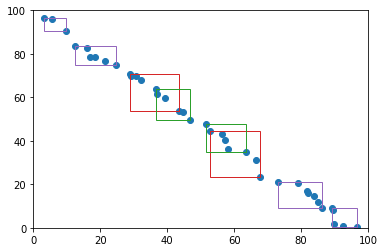

Arret


In [5]:
YN = NDTree(NBMAX=10)
FP = []
for i,p in enumerate(data):
    if YN.update(p):
        points, carre = YN.getPoints(True)

m = max(carre, key=lambda x: x[0])[0]
print(m)
colors = [u'#1f77b4', u'#ff7f0e', u'#2ca02c', u'#d62728', u'#9467bd', u'#8c564b', u'#e377c2', u'#7f7f7f', u'#bcbd22', u'#17becf']

for depth,yi, yn in carre:
    yi = np.array(yi)
    yn = np.array(yn)
    plt.gca().add_patch(
        Rectangle(
            yn,*(yi-yn),
            edgecolor=colors[depth],
            facecolor='none',
            lw=1)) 
plt.scatter(*np.array(points).T)
plt.xlim(xmin=0, xmax=100)
plt.ylim(ymin=0, ymax=100)
plt.show()
print("Arret")